# Notebook MNIST : Intro to Keras with MNIST
## Part 1: setup and imports

Date April 2025 - Lecture 2: AI Essentials for Business

In [1]:
!pip install -q tensorflow

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Here's more background resources --  https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb


# Part 2: Load and explore the MNIST dataset

In [23]:
# Load the dataset, for assignment 2, uncomment the fashion_mnist
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("Training set X shape:", x_train.shape)
print("Test set X shape:", x_test.shape)

print("Training set y shape:", y_train.shape)
print("Test set y shape:", y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set X shape: (60000, 28, 28)
Test set X shape: (10000, 28, 28)
Training set y shape: (60000,)
Test set y shape: (10000,)


Let's view as a sample some data

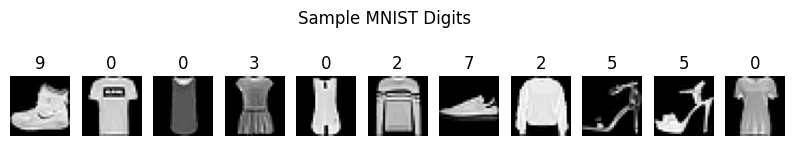

In [36]:
# Plot the first 5 to 10 imaages
plt.figure(figsize=(10,2))

for i in range(11):
    plt.subplot(1,11, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.suptitle('Sample MNIST Digits')
plt.show()


In [25]:
x_train[0].astype('float32') / 255.0

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Part 3: Preprocessing the data
Normalization and Reshaping

In [26]:
# Normalize pixel value to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape for NN input as we are using dense layers
x_train_flat = x_train.reshape(-1, 28*28) # 784 = 28*28
x_test_flat  = x_test.reshape(-1, 28*28)

print("New shape (flattened):", x_train_flat.shape)

New shape (flattened): (60000, 784)


## Part 4: Build the Neural Network Model

In [45]:
# Define a simple neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    #layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(  optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

c:\Users\ccame\CascadeProjects\1stNN\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,794 (526.54 KB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
784*128+128

100480

## Part 5: Train the model

In [47]:
# Train the model and save the training history
history = model.fit(    x_train_flat,
                        y_train,
                        epochs=25,
                        batch_size=32,
                        validation_split=0.1)

Epoch 1/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9261 - loss: 0.1933 - val_accuracy: 0.8947 - val_loss: 0.3312
Epoch 2/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9307 - loss: 0.1804 - val_accuracy: 0.8900 - val_loss: 0.3593
Epoch 3/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9300 - loss: 0.1806 - val_accuracy: 0.8940 - val_loss: 0.3529
Epoch 4/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9322 - loss: 0.1747 - val_accuracy: 0.8887 - val_loss: 0.3608
Epoch 5/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9320 - loss: 0.1787 - val_accuracy: 0.8908 - val_loss: 0.3934
Epoch 6/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9363 - loss: 0.1650 - val_accuracy: 0.8922 - val_loss: 0.3699
Epoch 7/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9393 - loss: 0.1596 - val_accuracy: 0.8895 - val_loss: 0.4086
Epoch 8/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9418 - loss: 0.1544 - 

## Part 6: Visualize Training Progress

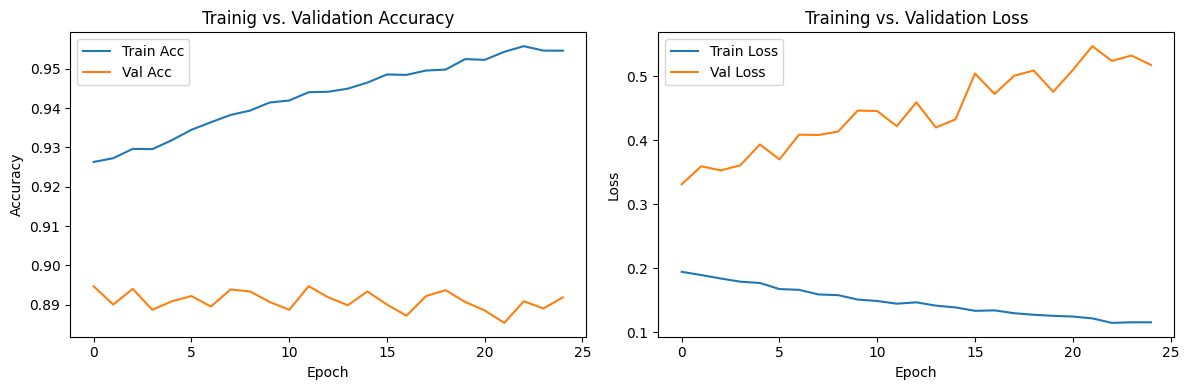

In [48]:
# Plot training & validation accuracy/loss
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Trainig vs. Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Part 7: Evaluate on Test Data


In [41]:
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.8862 - loss: 0.3669
Test Accuracy: 88.73%


## Part 8: Make Predictions and Visualize [Inference]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step


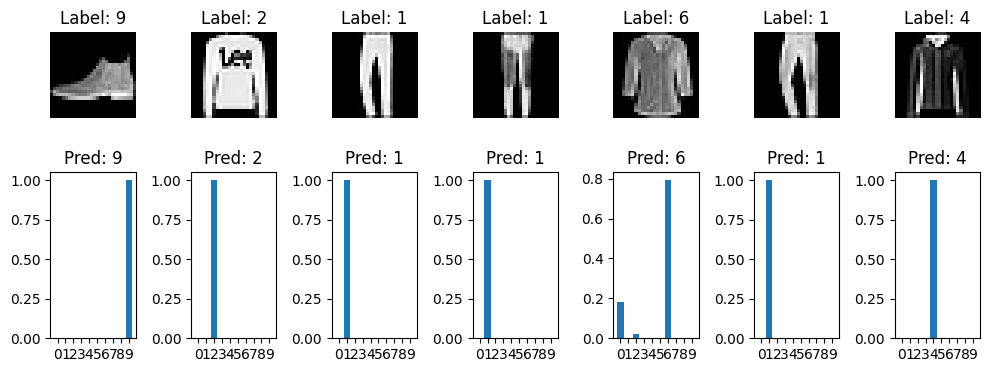

In [44]:
# Predict
predictions = model.predict(x_test_flat)

# Function to plot images with prediction
def plot_predictions(images, labels, preditions, num=10):
    plt.figure(figsize=(10,4))
    for i in range(num):
        plt.subplot(2, num, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
        plt.title(f"Label: {labels[i]}")

        plt.subplot(2, num, i+1+num)
        plt.bar(range(10), predictions[i])
        plt.xticks(range(10))
        plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.tight_layout()
    plt.show()

plot_predictions(x_test, y_test, predictions, 7)

## Part 9: Using a Convolutional Neural Network (Optional Adv.)

In [32]:
# Reshape for CNN

x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn  = x_train.reshape(-1, 28, 28, 1)

# print(x_train_cnn.shape, x_test_cnn.shape)

# CNN Model

cnn_model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(  optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

cnn_model.summary()

# Train CNN
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=5, batch_size=32, validation_split=0.1)

c:\Users\ccame\CascadeProjects\1stNN\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7613 - loss: 0.6622 - val_accuracy: 0.8795 - val_loss: 0.3324
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8827 - loss: 0.3211 - val_accuracy: 0.8853 - val_loss: 0.3092
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9005 - loss: 0.2680 - val_accuracy: 0.8920 - val_loss: 0.2987
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9170 - loss: 0.2271 - val_accuracy: 0.9092 - val_loss: 0.2510
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9278 - loss: 0.1935 - val_accuracy: 0.9057 - val_loss: 0.2554


## Part 10: Visualization CNN Results (Optional Adv.)


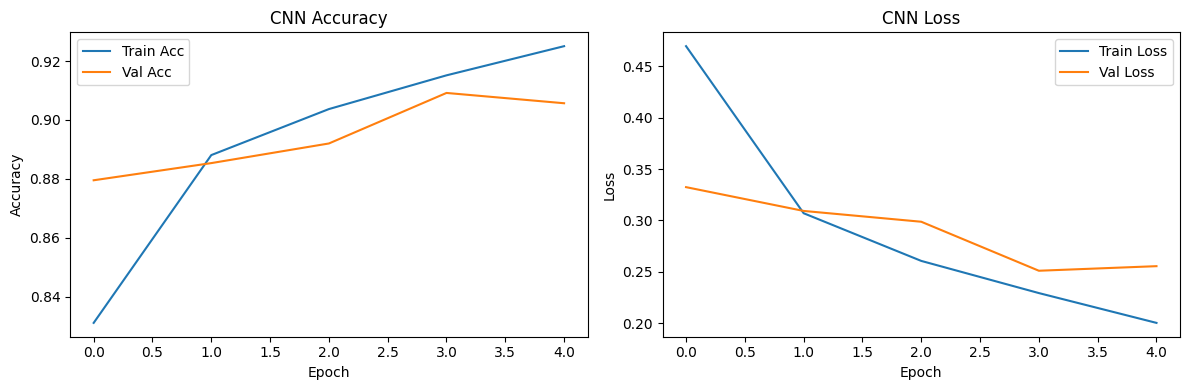

In [33]:
# Plot CNN training history
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Acc')
plt.plot(cnn_history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Loss')
plt.legend()

plt.tight_layout()
plt.show()